### Math 42, Homework 4
## Hector Lugo Barrios

In [1]:
import numpy as np
from numpy import random    
import matplotlib.pyplot as plt

In [2]:
"""
function run_recurrence
Runs the recurrence relation defined by x(n+1) = f(n,x(n))
inputs:
    f : the function defining the right hand side of the recurrence relation.
        f must have the function signature f(n,x,a,b,c,...) where the iterator
        n,x(n) appears first and all other parameters appear after.
    x0: the initial state of the recurrence relation. Can be any array-like
        object or number.
    N_steps: the number of steps you want to run your recurrence.
output:
    X : a large array containing all computed steps. X[k] is the kth step of the recurrence.
"""
def run_recurrence(f,x0,N_steps,*args):
    x0 = np.array(x0) # turning the initial condition into a numpy array to access the shape command
    X = np.empty((N_steps+1,*x0.shape)) # initializing X to have the correct size to store all iterations
    X[0] = x0 # loading the intial condition into the first element of X
    for i in range(1,N_steps+1):
        X[i]=f(i,X[i-1],*args) # looping through the recurrence relation
    return X

## 1. Deterministic

In [3]:
def deterministic(f, x0, N_steps):
    x0 = np.array(x0)
    X = np.empty((N_steps+1,*x0.shape))
    X[0] = x0
    for i in range(1,N_steps+1):
        X[i]=f(X[i-1]) # looping through the recurrence relation
    return X

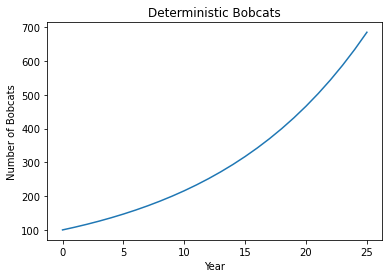

In [4]:
# Testing function
def test(x):
    return 1.08*x

x0 = 100
N_steps = 25
X = deterministic(test, x0, N_steps)

# Graphing
import matplotlib.pyplot as plt
plt.plot(np.arange(N_steps+1), X)
plt.xlabel('Year')
plt.ylabel('Number of Bobcats')
plt.title('Deterministic Bobcats')
plt.savefig("deterministic.jpg", dpi = 400)
plt.show()

## 2. Demographic Stochasticity

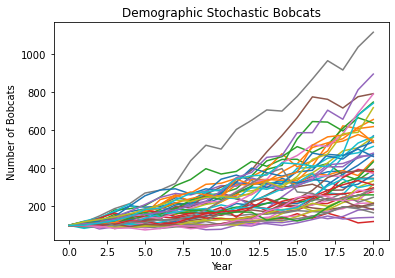

In [7]:
def run_recurrence1(f,x0,N_steps,*args):
    x0 = np.array(x0) # turning the initial condition into a numpy array to access the shape command
    X = np.empty((N_steps+1,*x0.shape)) # initializing X to have the correct size to store all iterations
    X[0] = x0 # loading the intial condition into the first element of X
    for i in range(1,N_steps+1):
        X[i]=f(i,X[i-1],*args) # looping through the recurrence relation
    return X

def stochastic_population_model(n,x,birth_mean,birth_sd,survival_mean,survival_sd):
    b = np.random.normal(birth_mean, birth_sd) # something with random.normal
    s = np.random.normal(survival_mean, survival_sd) # something with random.normal
    return (b+s)*x

x0 = 100
N_steps = 20
birth_mean = 0.4
birth_sd = 0.1
survival_mean = 0.68
survival_sd = 0.07

N_runs = 50
for i in range(N_runs):
    X = run_recurrence1(stochastic_population_model,x0,N_steps,birth_mean,birth_sd,survival_mean,survival_sd)
    plt.plot(np.arange(N_steps+1),X)
    plt.xlabel('Year')
    plt.ylabel('Number of Bobcats')
    plt.title('Demographic Stochastic Bobcats')
    plt.savefig("demographic.jpg", dpi = 400)
    
    

## 3. Environmental Stochasticity

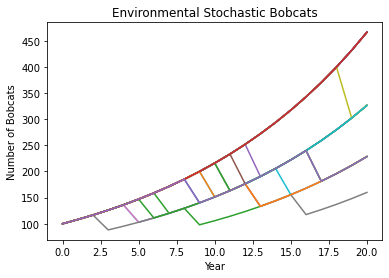

In [8]:
def run_recurrence2(f,x0,N_steps,*args):
    x0 = np.array(x0) # turning the initial condition into a numpy array to access the shape command
    X = np.empty((N_steps+1,*x0.shape)) # initializing X to have the correct size to store all iterations
    X[0] = x0 # loading the intial condition into the first element of X
    for i in range(1,N_steps+1):
        X[i]=f(i,X[i-1],*args) # looping through the recurrence relation
    return X

def only_environment(n,x,birth_mean,birth_sd, survival_mean, survival_sd,catastrophe_chance):
    b = birth_mean
    s = survival_mean
    catastrophe = np.random.uniform()<catastrophe_chance
    if catastrophe:
        b = 0.7*b
        s = 0.7*s
        return (b+s)*x
    return (b+s)*x
   
x0 = 100
N_steps = 20
birth_mean = 0.4
birth_sd = 0.1
survival_mean = 0.68
survival_sd = 0.07
catastrophe_chance = 0.04
N_runs = 25

for i in range(N_runs):
    X = run_recurrence2(only_environment,x0,N_steps,birth_mean,birth_sd,survival_mean,survival_sd,catastrophe_chance)
    plt.plot(np.arange(N_steps+1),X)
    plt.xlabel('Year')
    plt.ylabel('Number of Bobcats')
    plt.title('Environmental Stochastic Bobcats')
    plt.savefig("environmental.jpg", dpi = 400)

